In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv(r"D:\CSE445\PHFood_Brazil.csv", low_memory=False)

# Displaying the first few rows of the dataset to check
df.head()

,Unnamed: 0,Year,Food,Food (English),Region,State,Harvest Area (hectares),Food Production (tons),Energy (kcal),Protein (g),...,Authorized,Maximum Residue Limit (MRL),Acceptable Daily Intake (ADI),Residue Percentage,Food Acquisition (kg),Food Group (FG),Population Food Group,Bean Intake (Food Group),Vegetable Intake (Food Group),Fruit Intake (Food Group)
0,1,1974,ABACATE,AVOCADO,MIDWEST,DISTRITO FEDERAL,56.0,1176.0,1.411200e+09,2.622480e+07,...,NaN,NaN,NaN,NaN,NaN,FRUIT,NaN,NaN,NaN,NaN
1,2,1974,ABACAXI,PINEAPPLE,MIDWEST,DISTRITO FEDERAL,58.0,139.0,6.672000e+07,7.506000e+05,...,NaN,NaN,NaN,NaN,NaN,FRUIT,NaN,NaN,NaN,NaN
2,3,1974,ALHO,GARLIC,MIDWEST,DISTRITO FEDERAL,2.0,3.0,4.470000e+06,1.908000e+05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1974,AMENDOIM,PEANUT,MIDWEST,DISTRITO FEDERAL,25.0,21.0,1.190700e+08,5.418000e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1974,ARROZ,RICE,MIDWEST,DISTRITO FEDERAL,900.0,864.0,1.131370e+09,2.214333e+07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
#1. Shape & Missing Value Summary
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check the shape of the dataset
print("Dataset Shape:", df.shape)

# Display first few rows
print(df.head())

Dataset Shape: (439299, 52)
   Unnamed: 0  Year      Food Food (English)   Region             State  \
0           1  1974   ABACATE        AVOCADO  MIDWEST  DISTRITO FEDERAL   
1           2  1974   ABACAXI      PINEAPPLE  MIDWEST  DISTRITO FEDERAL   
2           3  1974      ALHO         GARLIC  MIDWEST  DISTRITO FEDERAL   
3           4  1974  AMENDOIM         PEANUT  MIDWEST  DISTRITO FEDERAL   
4           5  1974     ARROZ           RICE  MIDWEST  DISTRITO FEDERAL   

   Harvest Area (hectares)  Food Production (tons)  Energy (kcal)  \
0                     56.0                  1176.0   1.411200e+09   
1                     58.0                   139.0   6.672000e+07   
2                      2.0                     3.0   4.470000e+06   
3                     25.0                    21.0   1.190700e+08   
4                    900.0                   864.0   1.131370e+09   

    Protein (g)  ...  Authorized  Maximum Residue Limit (MRL)  \
0  2.622480e+07  ...         NaN         

Missing Values in each column:
Unnamed: 0                            0
Year                                  0
Food                               2196
Food (English)                     2196
Region                             1026
State                              1026
Harvest Area (hectares)            6611
Food Production (tons)             6611
Energy (kcal)                      6611
Protein (g)                       23495
Lipids (g)                         6611
Carbohydrates (g)                  6611
Fiber (g)                         23495
Calcium (mg)                       6611
Magnesium (mg)                     8121
Manganese (mg)                    25005
Phosphorus (mg)                   23495
Iron (mg)                         23495
Potassium (mg)                     8121
Copper (mg)                        8121
Zinc (mg)                          8121
Selenium (mcg)                    64284
Retinol (mcg)                    433881
Vitamin A (mcg)                  183858
Vitamin B

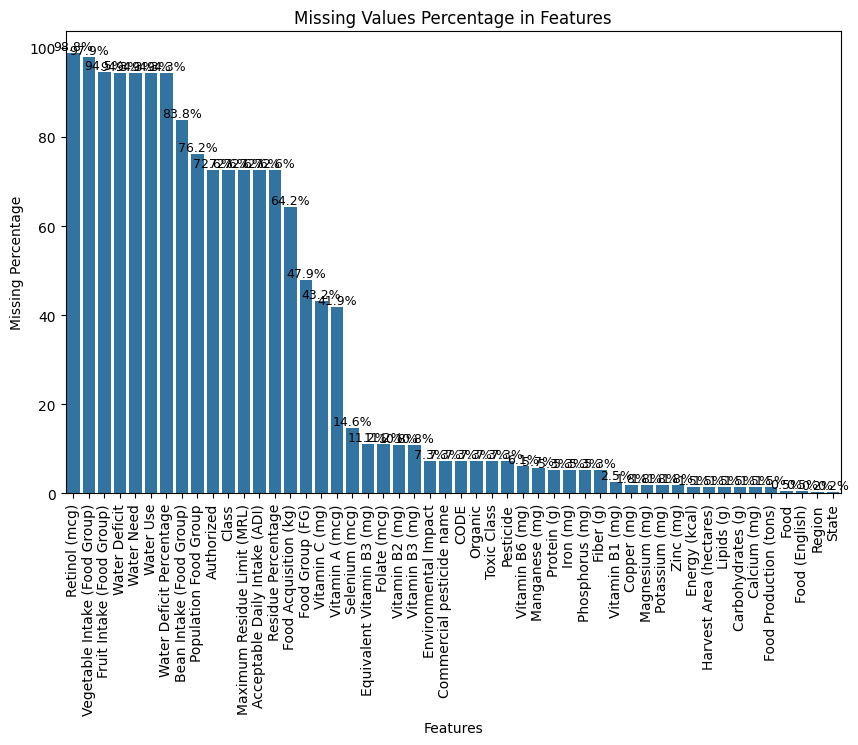

In [3]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values in each column:")
print(missing_values)

# Check for missing values percentage
missing_percentage = df.isnull().mean() * 100
missing_percentage = missing_percentage[missing_percentage > 0]
missing_percentage = missing_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values)
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Missing Percentage")
plt.title("Missing Values Percentage in Features")

# Annotate the bars with percentages
for i, value in enumerate(missing_percentage.values):
    plt.text(i, value, f"{value:.1f}%", ha='center', va='bottom', fontsize=9)

plt.show()

In [4]:
from sklearn.impute import SimpleImputer

# Drop columns with more than 50% missing values
df = df.dropna(thresh=0.5 * len(df), axis=1)

# Display all column names
print(df.columns)

Index(['Unnamed: 0', 'Year', 'Food', 'Food (English)', 'Region', 'State',
       'Harvest Area (hectares)', 'Food Production (tons)', 'Energy (kcal)',
       'Protein (g)', 'Lipids (g)', 'Carbohydrates (g)', 'Fiber (g)',
       'Calcium (mg)', 'Magnesium (mg)', 'Manganese (mg)', 'Phosphorus (mg)',
       'Iron (mg)', 'Potassium (mg)', 'Copper (mg)', 'Zinc (mg)',
       'Selenium (mcg)', 'Vitamin A (mcg)', 'Vitamin B1 (mg)',
       'Vitamin B2 (mg)', 'Vitamin B3 (mg)', 'Equivalent Vitamin B3 (mg)',
       'Vitamin B6 (mg)', 'Folate (mcg)', 'Vitamin C (mg)', 'CODE',
       'Commercial pesticide name', 'Pesticide', 'Organic', 'Toxic Class',
       'Environmental Impact', 'Food Group (FG)'],
      dtype='object')


In [5]:
#Drop Unnamed: 0 
df.drop(columns=['Unnamed: 0'], inplace=True)

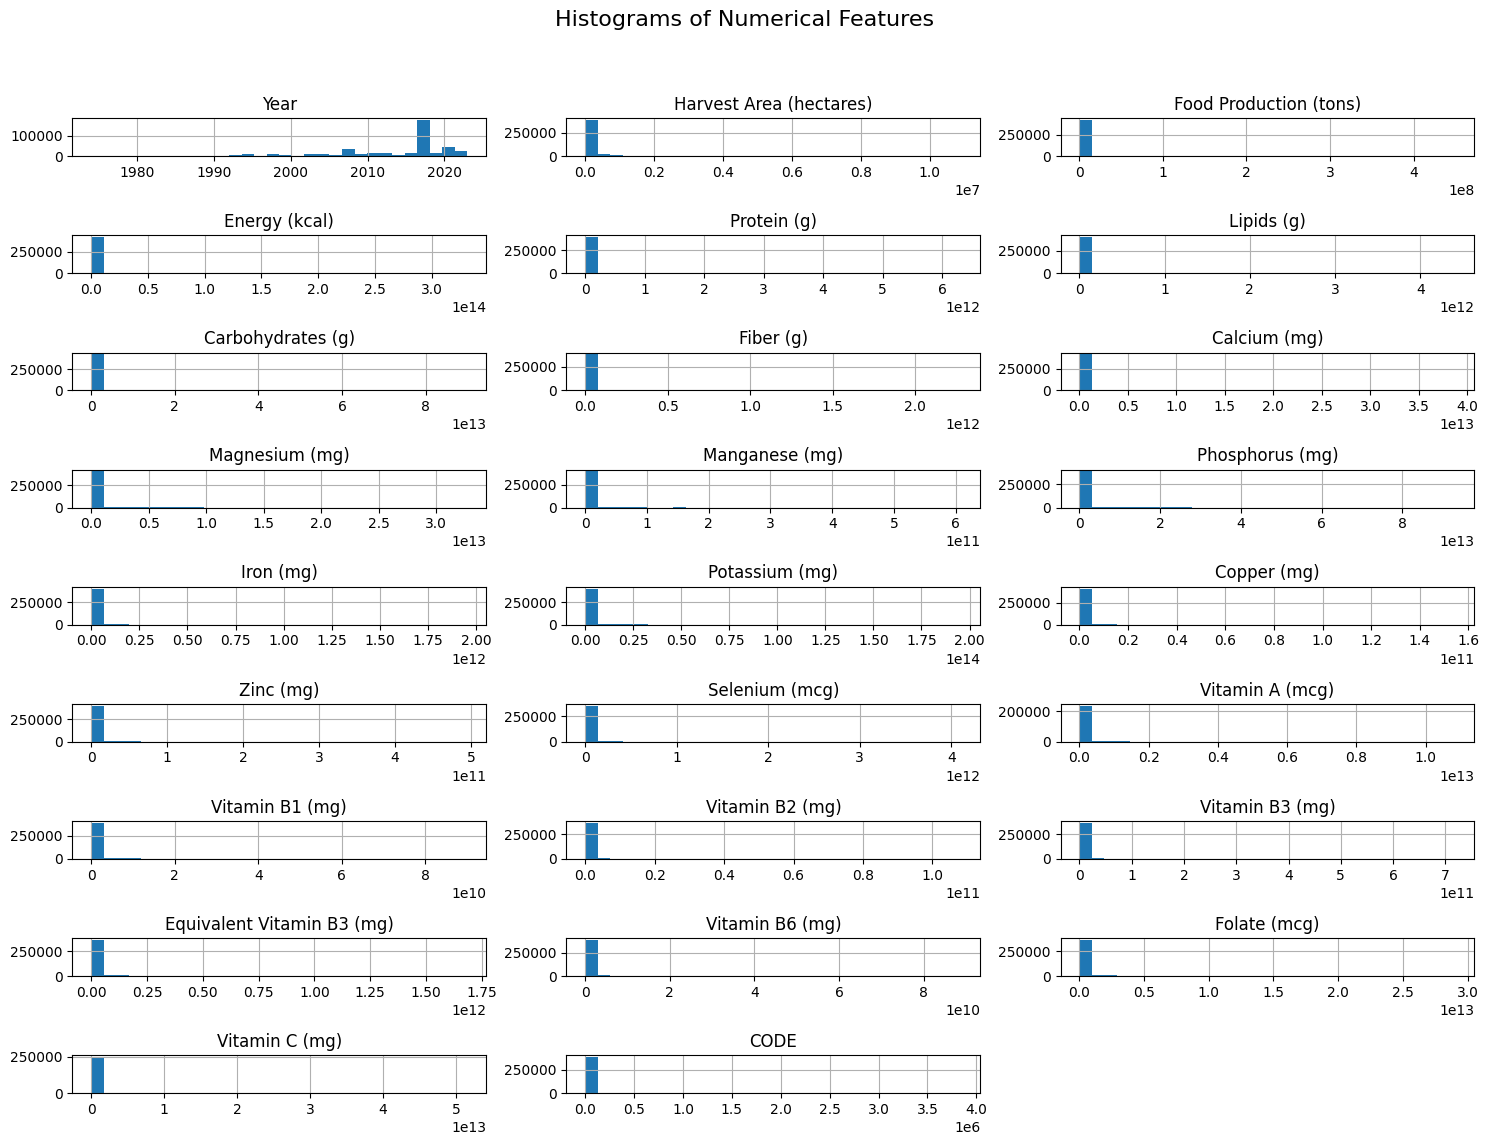

In [6]:
#histogram for numerical features
import matplotlib.pyplot as plt

# Select only numerical columns
num_cols = df.select_dtypes(include=['number']).columns

# Plot histograms
df[num_cols].hist(bins=30, figsize=(15, 12), layout=(len(num_cols) // 3 + 1, 3))
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

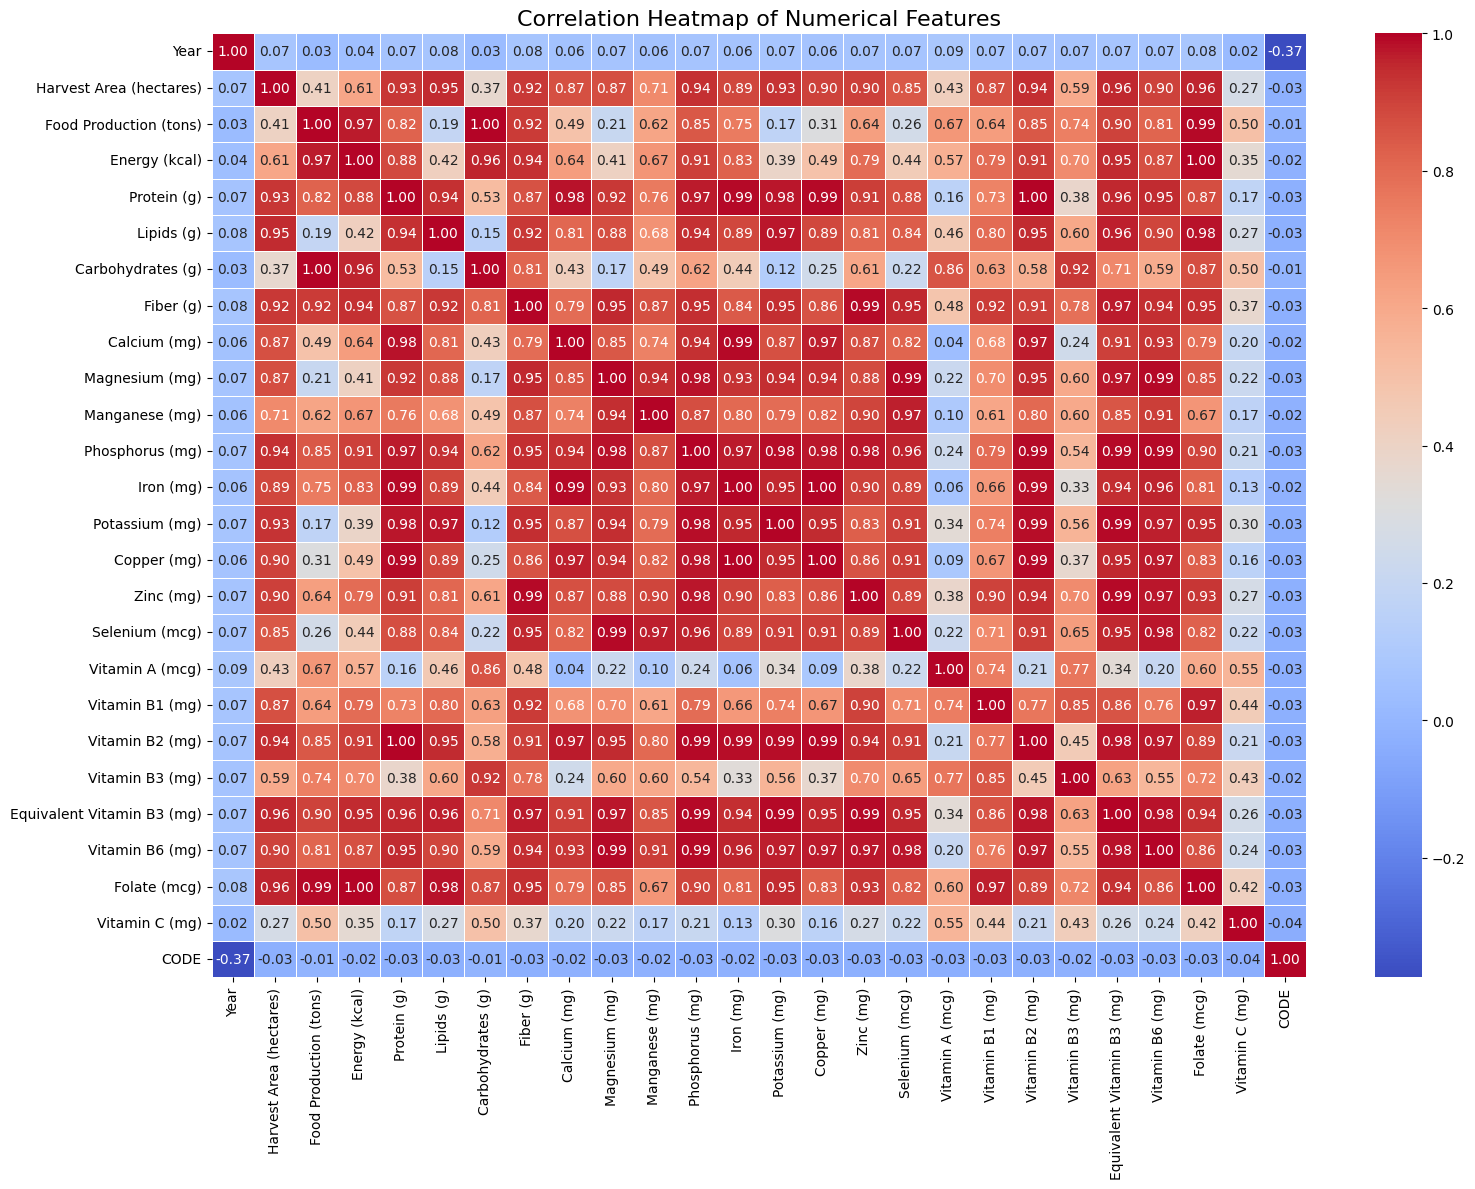

In [7]:
#heatmap
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
corr = df.select_dtypes(include=['number']).corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

In [10]:
# Creating target variable column if not already present
df["healthy"] = df["Energy (kcal)"] < 250  # Initial rule-based labeling
df["healthy"] = df["healthy"].astype(int)

# Define a more comprehensive health score
df["health_score"] = (
    df["Protein (g)"] * 2 +            # More protein = better
    df["Fiber (g)"] * 1.5 +            # Fiber is also good
    df["Vitamin A (mcg)"] * 0.5 +
    df["Vitamin C (mg)"] * 0.5 +
    df["Iron (mg)"] * 0.5 +
    df["Calcium (mg)"] * 0.5 -
    df["Lipids (g)"] * 1 -             # Fats and carbs reduce score
    df["Carbohydrates (g)"] * 0.5
)

# Classify as healthy if above median health score
df["healthy"] = (df["health_score"] >= df["health_score"].median()).astype(int)

# Foods above the median score → healthy = 1
# Foods below the median score → healthy = 0


In [9]:
#fixing class imbalance
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd

# Select features and target
X = df[[  # List of relevant features
    "Energy (kcal)", "Protein (g)", "Lipids (g)", "Carbohydrates (g)", "Fiber (g)",
    "Calcium (mg)", "Magnesium (mg)", "Manganese (mg)", "Phosphorus (mg)", "Iron (mg)",
    "Potassium (mg)", "Copper (mg)", "Zinc (mg)", "Selenium (mcg)", "Vitamin A (mcg)",
    "Vitamin B1 (mg)", "Vitamin B2 (mg)", "Vitamin B3 (mg)", "Equivalent Vitamin B3 (mg)",
    "Vitamin B6 (mg)", "Folate (mcg)", "Vitamin C (mg)"
]]
y = df["healthy"]

# Class distribution before
print("Before Under-Sampling:")
print(y.value_counts())

# Apply under-sampling
UnderS = RandomUnderSampler(random_state=42, replacement=False)
X_Under, Y_Under = UnderS.fit_resample(X, y)

# Class distribution after
print("After Under-Sampling:")
print(pd.Series(Y_Under).value_counts())


Before Under-Sampling:
healthy
0    321606
1    117693
Name: count, dtype: int64
After Under-Sampling:
healthy
0    117693
1    117693
Name: count, dtype: int64


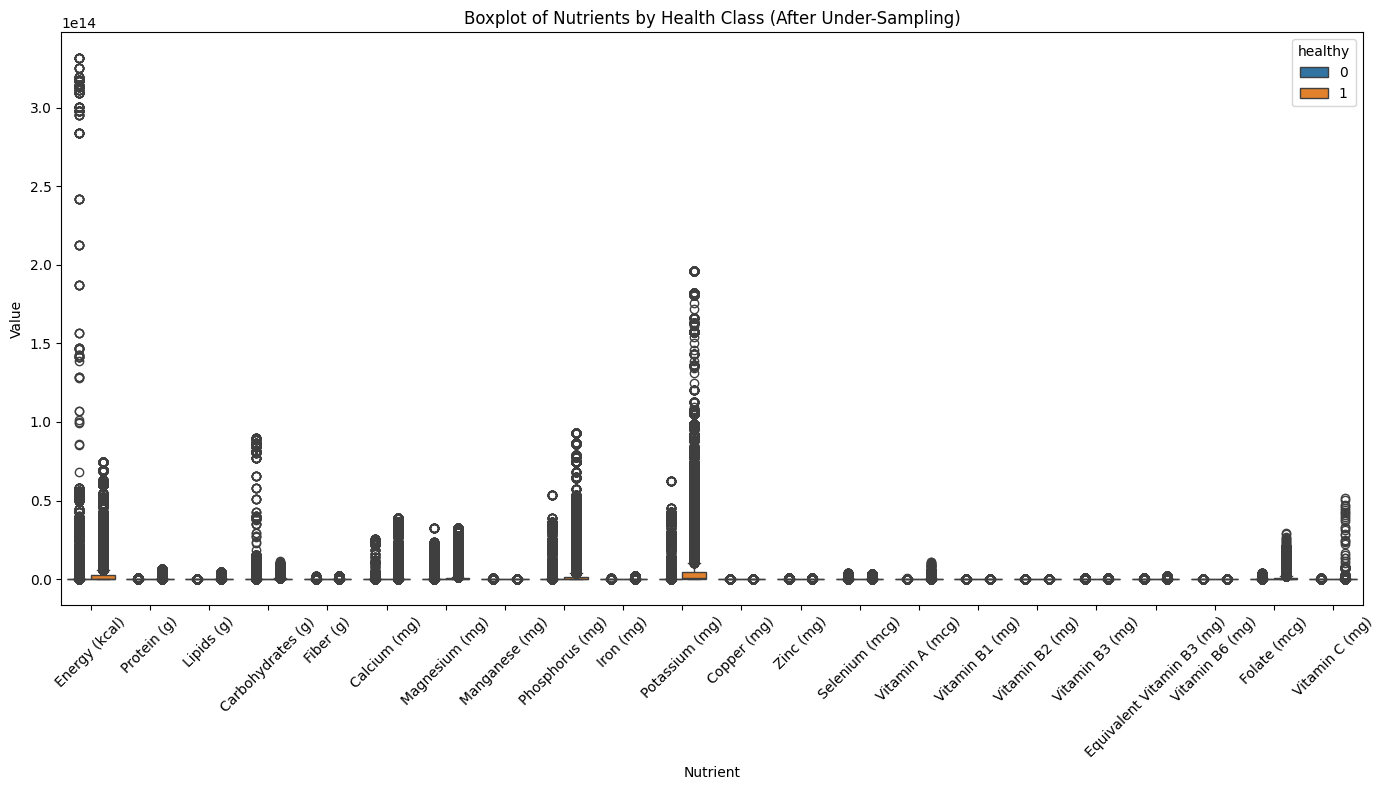

In [11]:
# boxplot of numerical features
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_under and y_under are the under-sampled data and labels
# Create a new DataFrame with under-sampled data and combine features with labels
df_under = pd.DataFrame(X_Under, columns=[
    "Energy (kcal)", "Protein (g)", "Lipids (g)", "Carbohydrates (g)", "Fiber (g)",
    "Calcium (mg)", "Magnesium (mg)", "Manganese (mg)", "Phosphorus (mg)", "Iron (mg)",
    "Potassium (mg)", "Copper (mg)", "Zinc (mg)", "Selenium (mcg)", "Vitamin A (mcg)",
    "Vitamin B1 (mg)", "Vitamin B2 (mg)", "Vitamin B3 (mg)", "Equivalent Vitamin B3 (mg)",
    "Vitamin B6 (mg)", "Folate (mcg)", "Vitamin C (mg)"
])

df_under["healthy"] = Y_Under

# Melt the DataFrame for seaborn boxplot
df_melted = df_under.melt(id_vars="healthy", var_name="Nutrient", value_name="Value")

# Plot
plt.figure(figsize=(14, 8))
sns.boxplot(data=df_melted, x="Nutrient", y="Value", hue="healthy")
plt.title("Boxplot of Nutrients by Health Class (After Under-Sampling)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [31]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into 70% training and 30% (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Split the remaining 30% into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Check the data split
print(f"Training data size: {X_train.shape[0]}")
print(f"Validation data size: {X_val.shape[0]}")
print(f"Test data size: {X_test.shape[0]}")


Training data size: 307509
Validation data size: 65895
Test data size: 65895


In [15]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

# Apply One-Hot Encoding only if categorical columns exist
encoder = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # ✅ Fixed parameter
    ],
    remainder='passthrough'
)

X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Convert back to DataFrame to retain column names
encoded_feature_names = encoder.get_feature_names_out()
X_train_encoded = pd.DataFrame(X_train_encoded, columns=encoded_feature_names, index=X_train.index)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=encoded_feature_names, index=X_test.index)

print("✅ One-Hot Encoding Applied Successfully!")


✅ One-Hot Encoding Applied Successfully!


In [16]:
# Fill numerical columns with mean
num_cols = df.select_dtypes(include=['number']).columns
num_imputer = SimpleImputer(strategy="mean")
df[num_cols] = pd.DataFrame(num_imputer.fit_transform(df[num_cols]), columns=num_cols, index=df.index)

# Fill categorical columns with mode — only if such columns exist
cat_cols = df.select_dtypes(include=['object']).columns
if len(cat_cols) > 0:
    cat_imputer = SimpleImputer(strategy="most_frequent")
    df[cat_cols] = pd.DataFrame(cat_imputer.fit_transform(df[cat_cols]), columns=cat_cols, index=df.index)

# Checking summary statistics to identify scaling needs
df.describe()

,Year,Harvest Area (hectares),Food Production (tons),Energy (kcal),Protein (g),Lipids (g),Carbohydrates (g),Fiber (g),Calcium (mg),Magnesium (mg),...,Vitamin B1 (mg),Vitamin B2 (mg),Vitamin B3 (mg),Equivalent Vitamin B3 (mg),Vitamin B6 (mg),Folate (mcg),Vitamin C (mg),CODE,healthy,health_score
count,439299.000000,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,...,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,4.392990e+05,439299.000000,4.392990e+05
mean,2012.546698,1.918558e+05,1.546598e+06,1.728772e+12,5.799736e+10,5.250432e+10,2.995857e+11,3.476083e+10,3.477856e+11,3.817566e+11,...,1.315947e+09,1.112909e+09,7.768030e+09,2.125395e+10,1.000689e+09,3.292956e+11,5.238785e+10,1.075994e+05,0.267911,4.264755e+11
std,9.809825,7.247656e+05,1.507092e+07,1.191925e+13,3.344501e+11,2.648563e+11,3.005304e+12,1.538663e+11,2.187452e+12,1.960049e+12,...,5.880623e+09,5.821175e+09,3.650488e+10,9.777678e+10,5.075236e+09,1.372779e+12,3.036492e+11,3.896578e+05,0.442871,1.600001e+12
min,1974.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.120000e+02,0.000000,0.000000e+00
25%,2008.000000,2.600000e+01,1.680000e+02,5.940000e+07,1.712500e+06,3.080000e+05,1.258190e+07,3.125000e+06,1.952987e+07,2.500000e+07,...,1.104000e+05,1.175000e+05,7.504000e+05,2.162000e+06,1.522200e+05,3.135000e+07,5.771500e+08,1.091500e+04,0.000000,1.757099e+09
50%,2018.000000,3.535000e+03,1.824200e+04,1.469840e+10,4.820437e+08,1.379004e+08,2.565502e+09,5.633000e+08,2.823240e+09,4.522616e+09,...,1.461464e+07,9.066120e+06,5.281020e+07,2.744539e+08,1.353856e+07,6.070680e+09,5.238785e+10,2.081800e+04,0.000000,4.264755e+11
75%,2018.000000,7.081400e+04,1.936300e+05,1.623137e+11,6.716398e+09,2.315175e+09,3.021552e+10,6.252883e+09,3.562737e+10,4.929877e+10,...,1.539486e+08,1.654200e+08,1.397150e+09,4.461464e+09,1.928242e+08,1.548332e+11,5.238785e+10,3.471800e+04,1.000000,4.264755e+11
max,2023.000000,1.092462e+07,4.504246e+08,3.314224e+14,6.327424e+12,4.415128e+12,8.994979e+13,2.281523e+12,3.878589e+13,3.270183e+13,...,9.008491e+10,1.083724e+11,7.196332e+11,1.685285e+12,8.897941e+10,2.907930e+13,5.156729e+13,3.848304e+06,1.000000,5.007940e+13


In [19]:
# Define Features and Target
# List of features (nutritional values)
features = [
    "Energy (kcal)", "Protein (g)", "Lipids (g)", "Carbohydrates (g)", "Fiber (g)",
    "Calcium (mg)", "Magnesium (mg)", "Manganese (mg)", "Phosphorus (mg)", "Iron (mg)",
    "Potassium (mg)", "Copper (mg)", "Zinc (mg)", "Selenium (mcg)", "Vitamin A (mcg)",
    "Vitamin B1 (mg)", "Vitamin B2 (mg)", "Vitamin B3 (mg)", "Equivalent Vitamin B3 (mg)",
    "Vitamin B6 (mg)", "Folate (mcg)", "Vitamin C (mg)"
]

# The target column (healthy: 1 for healthy, 0 for unhealthy)
target = "healthy"

# Separate the features and target variable
X = df[features]  # Features (nutritional values)
y = df[target]    # Target variable (healthy or unhealthy)


In [22]:
#train the randomforest model
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Show the first few predicted values
print(y_val_pred[:10])  # Display the first 10 predictions

[0 0 0 0 0 1 0 1 0 0]


In [24]:
#Evaluate the Model’s Performance
# Calculate accuracy on the validation set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {accuracy:.4f}")


Validation Accuracy: 1.0000


In [25]:
#Evaluate on the Test Set: You should check the model’s performance on the test set (X_test) to see how it generalizes to unseen data
# Make predictions on the test set
y_test_pred = rf_model.predict(X_test)

# Calculate accuracy on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 1.0000


In [26]:
#Check the Classification Report
from sklearn.metrics import classification_report

# Print classification report for the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     48207
           1       1.00      1.00      1.00     17688

    accuracy                           1.00     65895
   macro avg       1.00      1.00      1.00     65895
weighted avg       1.00      1.00      1.00     65895



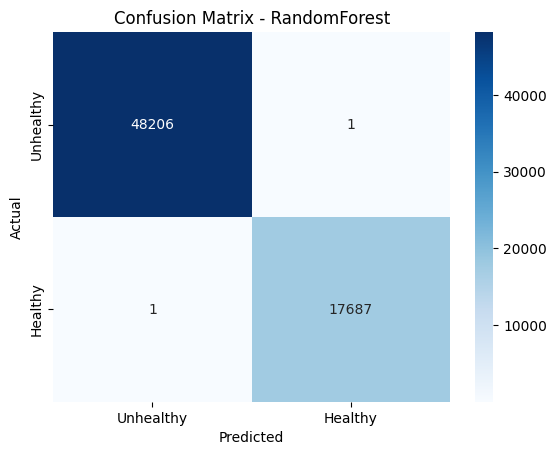

In [27]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Unhealthy', 'Healthy'], yticklabels=['Unhealthy', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RandomForest')
plt.show()


In [28]:
#Cross-validation
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(rf_model, X, y, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Mean cross-validation score: {cross_val_scores.mean()}")

Cross-validation scores: [0.99829274 0.99970407 1.         1.         0.99981789]
Mean cross-validation score: 0.999562940628022


In [32]:
#Initialize the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)


In [33]:

# Initialize the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
ada_model.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=42)

In [34]:
#Validate the model
from sklearn.metrics import accuracy_score

# Predict on validation set
y_val_pred = ada_model.predict(X_val)

# Calculate accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")



Validation Accuracy: 0.9968


In [35]:
#test the adaboost model
# Predict on test set
y_test_pred = ada_model.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.9968


In [36]:
#Classification report
from sklearn.metrics import classification_report

# Classification report on the test set
print("Classification Report (Test Set):")
print(classification_report(y_test, y_test_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     48207
         1.0       0.99      0.99      0.99     17688

    accuracy                           1.00     65895
   macro avg       1.00      1.00      1.00     65895
weighted avg       1.00      1.00      1.00     65895



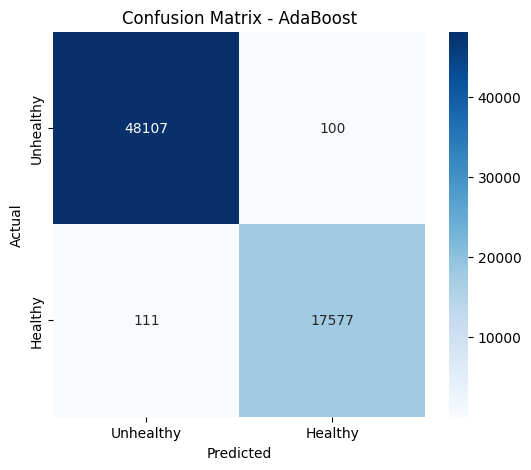

In [37]:
# Get predictions from AdaBoost
y_test_pred_ada = ada_model.predict(X_test)

# Generate the confusion matrix for AdaBoost
cm_ada = confusion_matrix(y_test, y_test_pred_ada)

# Plot the confusion matrix for AdaBoost
plt.figure(figsize=(6, 5))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', xticklabels=['Unhealthy', 'Healthy'], yticklabels=['Unhealthy', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost')
plt.show()


In [38]:

# Cross-validation for AdaBoost
cross_val_scores_ada = cross_val_score(ada_model, X_train, y_train, cv=5)
print(f"AdaBoost Cross-validation scores: {cross_val_scores_ada}")
print(f"Mean AdaBoost cross-validation score: {cross_val_scores_ada.mean()}")


AdaBoost Cross-validation scores: [0.99778869 0.99694319 0.99710579 0.9971383  0.99593503]
Mean AdaBoost cross-validation score: 0.9969821987415871


In [39]:
#Start of xgBoost and initialization
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [40]:

# Train the model on the training data
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [41]:
#Predict on the Validation Set
y_val_pred = xgb_model.predict(X_val)

In [42]:
# Calculate accuracy on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")

Validation Accuracy: 1.0000


In [43]:
# Generate classification report
print("Classification Report (Validation Set):")
print(classification_report(y_val, y_val_pred))


Classification Report (Validation Set):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     48310
         1.0       1.00      1.00      1.00     17585

    accuracy                           1.00     65895
   macro avg       1.00      1.00      1.00     65895
weighted avg       1.00      1.00      1.00     65895



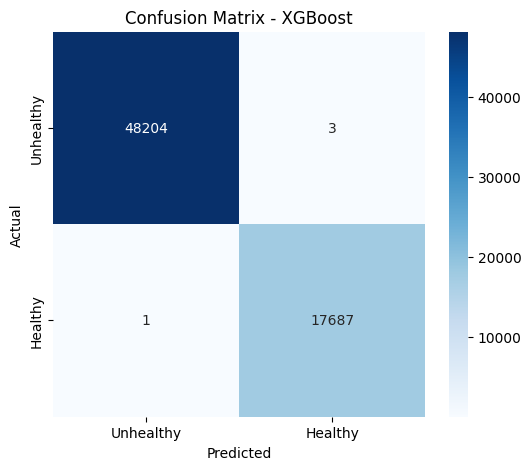

In [46]:
# Get predictions from XGBoost
y_test_pred_xgb = xgb_model.predict(X_test)

# Generate the confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, y_test_pred_xgb)

# Plot the confusion matrix for XGBoost
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Unhealthy', 'Healthy'], yticklabels=['Unhealthy', 'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost')
plt.show()


In [50]:
# Cross-validation for XGBoost
cross_val_scores_xg = cross_val_score(xgb_model, X_train, y_train, cv=5)
print(f"XGBoost Cross-validation scores: {cross_val_scores_xg}")
print(f"Mean XGBoost cross-validation score: {cross_val_scores_xg.mean()}")


XGBoost Cross-validation scores: [0.99996748 0.99990244 0.99993496 0.99995122 0.9999187 ]
Mean XGBoost cross-validation score: 0.9999349612002877


In [51]:
#Hyperparameter Tuning Using GridSearchCV for RandomForest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model
rf_model = RandomForestClassifier(random_state=42)

# Define the hyperparameters grid to search
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                              cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the training data
grid_search_rf.fit(X_val, y_val)

# Get the best parameters and the best model
best_rf_model = grid_search_rf.best_estimator_

# Print the best hyperparameters
print(f"Best RandomForest Hyperparameters: {grid_search_rf.best_params_}")


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best RandomForest Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [52]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the base model
base_model = DecisionTreeClassifier(max_depth=1)

# Updated for newer scikit-learn versions
ada_model = AdaBoostClassifier(estimator=base_model, random_state=42)

# Define the hyperparameter grid
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1, 10]
}

# Perform Grid Search on validation set
grid_search_ada = GridSearchCV(estimator=ada_model, param_grid=param_grid_ada,
                               cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

grid_search_ada.fit(X_val, y_val)

# Best model and params
best_ada_model = grid_search_ada.best_estimator_
print("Best AdaBoost Parameters:", grid_search_ada.best_params_)


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best AdaBoost Parameters: {'learning_rate': 1, 'n_estimators': 200}


In [53]:
#Hyperparameter Tuning Using GridSearchCV for XGBoost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
xgb_model = XGBClassifier(random_state=42)

# Define the hyperparameters grid to search
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, 
                               cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit GridSearchCV to the validation data
grid_search_xgb.fit(X_val, y_val)

# Get the best parameters and the best model
best_xgb_model = grid_search_xgb.best_estimator_

# Print the best hyperparameters
print(f"Best XGBoost Hyperparameters: {grid_search_xgb.best_params_}")




Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best XGBoost Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}


In [63]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from xgboost import XGBClassifier

# Define models with the best hyperparameters
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
ada = AdaBoostClassifier(learning_rate=1, n_estimators=200)
xgb = XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9)

# Create the soft voting classifier
voting_clf = VotingClassifier(estimators=[
    ('rf', rf),
    ('ada', ada),
    ('xgb', xgb)
], voting='soft')

# Fit the classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions using the soft voting classifier
y_pred = voting_clf.predict(X_test)

# You can also get the predicted probabilities if needed
y_pred_prob = voting_clf.predict_proba(X_test)




In [66]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     48207
         1.0       1.00      1.00      1.00     17688

    accuracy                           1.00     65895
   macro avg       1.00      1.00      1.00     65895
weighted avg       1.00      1.00      1.00     65895



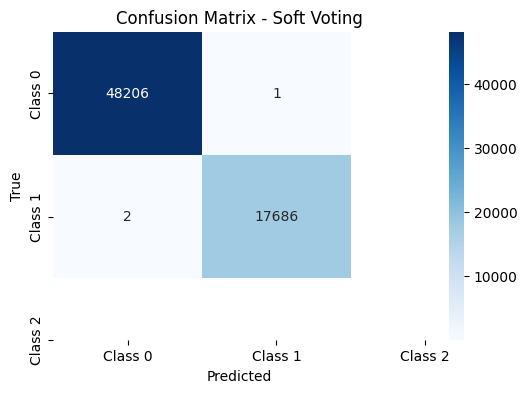

In [67]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Soft Voting')
plt.show()
